<a href="https://colab.research.google.com/github/shamrayann/python_for_ds_tasks/blob/main/HW_11_1_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
from google.colab import drive
df =pd.read_csv('/content/drive/MyDrive/data/home_tasks/yulu_rental.csv')

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
def get_india_season(month):
    if month in [12, 1, 2]:
        return 1
    elif month in [3, 4, 5]:
        return 2
    elif month in [6, 7, 8, 9]:
        return 3
    else:
        return 4
df['weather_season_india'] = df['month'].apply(get_india_season)
df[['month', 'weather_season_india']].head()

KeyError: 'month'

In [ ]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [ ]:
df.shape


(10886, 19)

In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


Цей набір даних містить 10886 рядків та 19 колонок.Дані мають погодинну деталізацію по оренді велосипедів. Це дає змогу аналізувати зміну попиту протягом дня, тижня, місяця та року.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [ ]:
daily_rentals = df.groupby('date')['count'].sum()

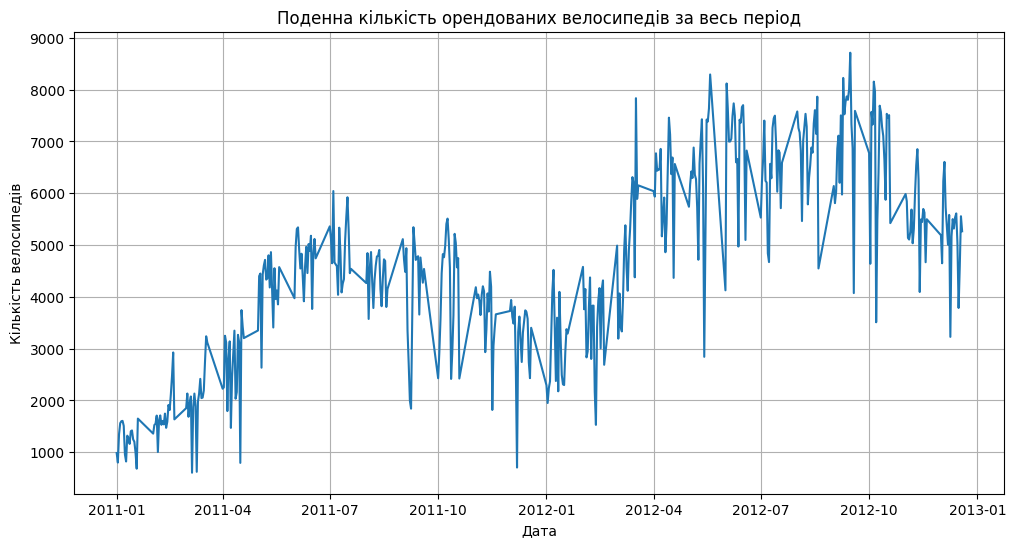

In [ ]:
plt.figure(figsize=(12,6))
daily_rentals.plot()
plt.title('Поденна кількість орендованих велосипедів за весь період')
plt.xlabel('Дата')
plt.ylabel('Кількість велосипедів')
plt.grid(True)
plt.show()

Оскільки значно відрізняється кількість оренд у різні дні, через це і виникають заломи. Це може бути пов'язано із погодними умовами, святами, вихідними днями. Для зменшення заломів на графіку можна використовувати ковзне середнє значення. Це дозвлить згладити різкі коливання та побачити тенденцію зміни кількості оренд велосипедів.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

In [ ]:
season_avg = df.groupby('season')['count'].mean()

In [ ]:
season_names = {
    1: 'Q1',
    2: 'Q2',
    3: 'Q3',
    4: 'Q4'
}

season_avg.index = season_avg.index.map(season_names)

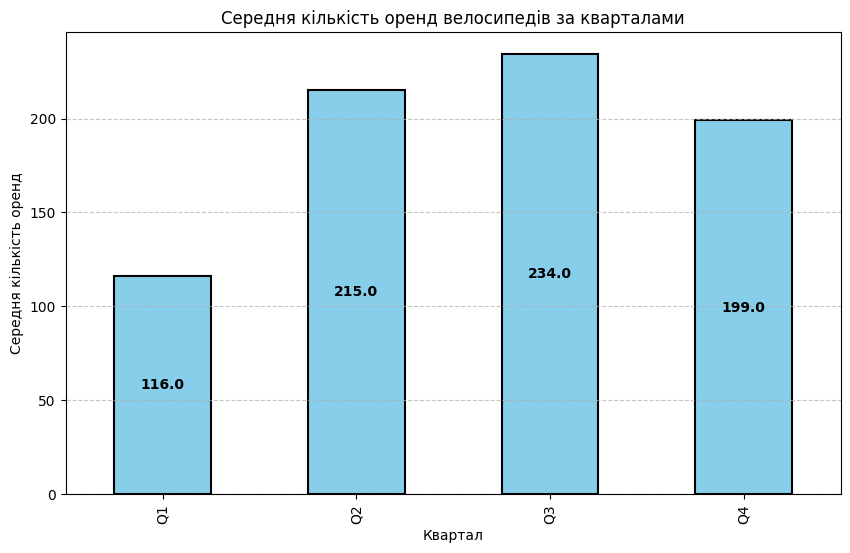

In [ ]:
plt.figure(figsize=(10,6))

ax = season_avg.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black',
    linewidth=1.5
)
plt.title('Середня кількість оренд велосипедів за кварталами')
plt.xlabel('Квартал')
plt.ylabel('Середня кількість оренд')

plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(season_avg):
    plt.text(
        i,
        value/2,
        round(value, 0),
        ha='center',
        va='center',
        fontweight='bold'
    )

plt.show()

Найбільша середня кількість оренд велосипедів  у Q3 (3 кварталі) і становить  234 оренди. Таку сезонну закономірність можна пояснити тим, що це літній період, хоча і сезон мусонів, але температура комфортна, тому люди пересуваються на велосипедах. А от у  Q1 (1 кварталі) оренда найменша через холодну погоду. Оренда велосипедів між найпопулярнішим та найменш популярним кварталами відрізняється у 2 рази.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


Text(0, 0.5, 'Середня кількість оренд')

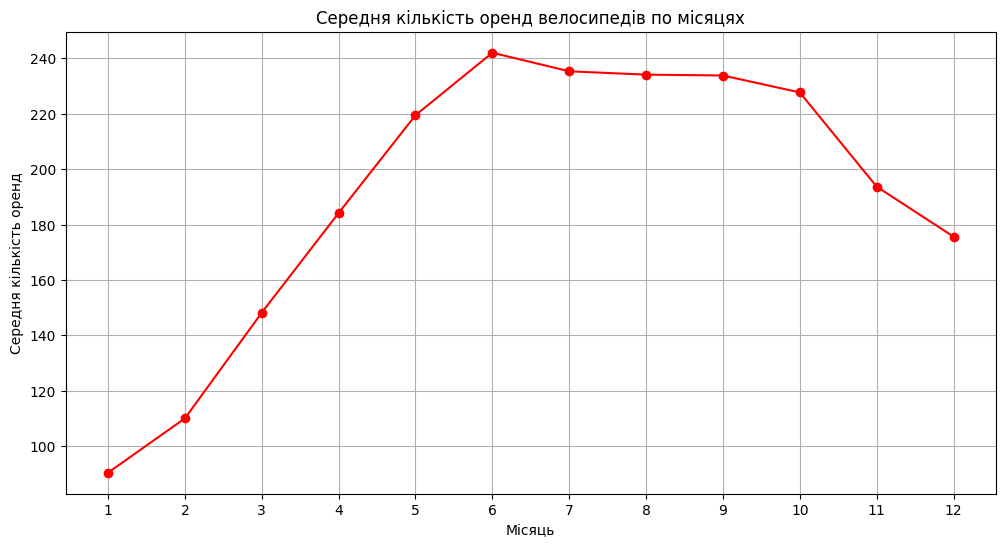

In [ ]:
monthly_avg = df.groupby('month')['count'].mean()

# будуємо графік через pandas
ax = monthly_avg.plot(
    kind='line',
    figsize=(12,6),
    color='red',
    marker='o',
    grid=True
)
ax.set_xticks(range(1,13))
ax.set_title('Середня кількість оренд велосипедів по місяцях')
ax.set_xlabel('Місяць')
ax.set_ylabel('Середня кількість оренд')

Пік оренди спостерігається у 6 місяці, а спад у 1 місяці.Так, ця закономірність збігається з попереднім завданням адже 6 місяць відповідає Q3, а перший місяць відповідає Q1. У холодну пору року оренда велосипедів не користується попитом, а у теплу пору року люди активно виїзджають.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

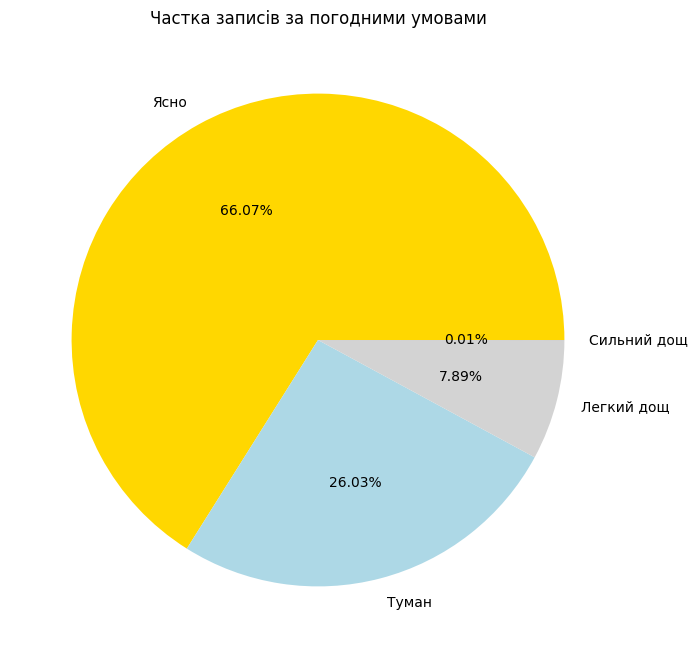

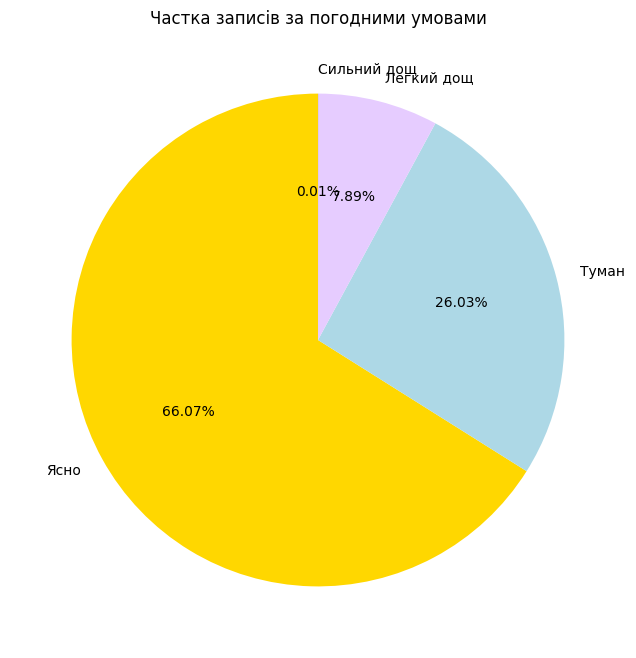

In [ ]:
weather_counts.plot.pie(
    figsize=(8,8),
    autopct='%1.2f%%',
    labels=['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'],
    colors=['gold','lightblue','#E6CCFF','gray'],
    startangle=90,
    title='Частка записів за погодними умовами'
)

plt.ylabel('')
plt.show()



У датасеті переважає ясна погода. Дні із сильним дощем трапляються дуже рідко і становлять приблизно 0,01%. Погодні умови впливають на попит: у ясну погоду кількість оренд зростає, а під час дощу зменшується.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

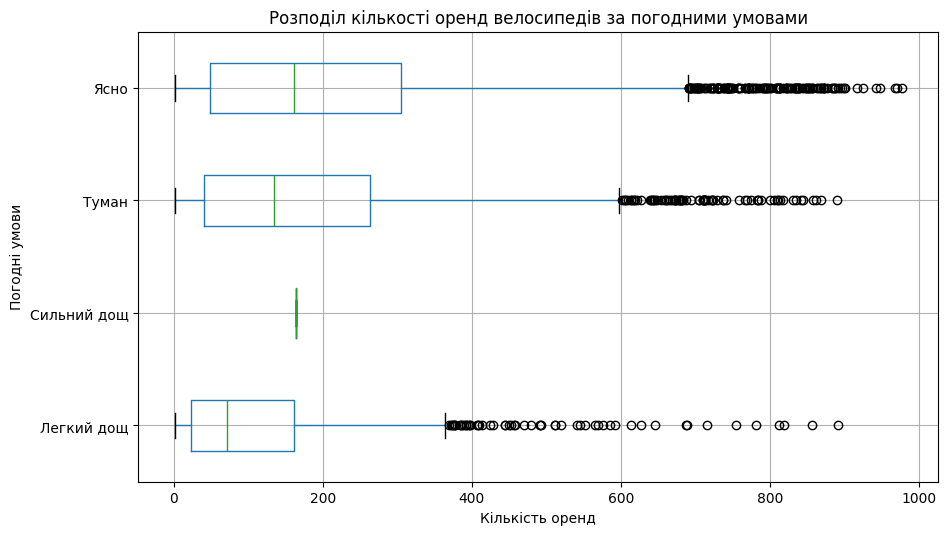

In [ ]:
weather_names = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}

df['weather_name'] = df['weather'].map(weather_names)
df.boxplot(
    column='count',
    by='weather_name',
    figsize=(10,6),
    vert=False
)

plt.title('Розподіл кількості оренд велосипедів за погодними умовами')
plt.suptitle('')
plt.xlabel('Кількість оренд')
plt.ylabel('Погодні умови')

plt.show()

Найбільший розкид кількості оренд спостерігається при ясній погоді.
Так, викиди присутні.Викиди спостерігаються під час ясної погоди, легкого дощу та туману. Найвище медіанне значення кількості оренд спостерігається при ясній погоді. Оскільки при ясній погоді орендують більше велосипедів.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

**Увага!** За замовченням буде колір

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

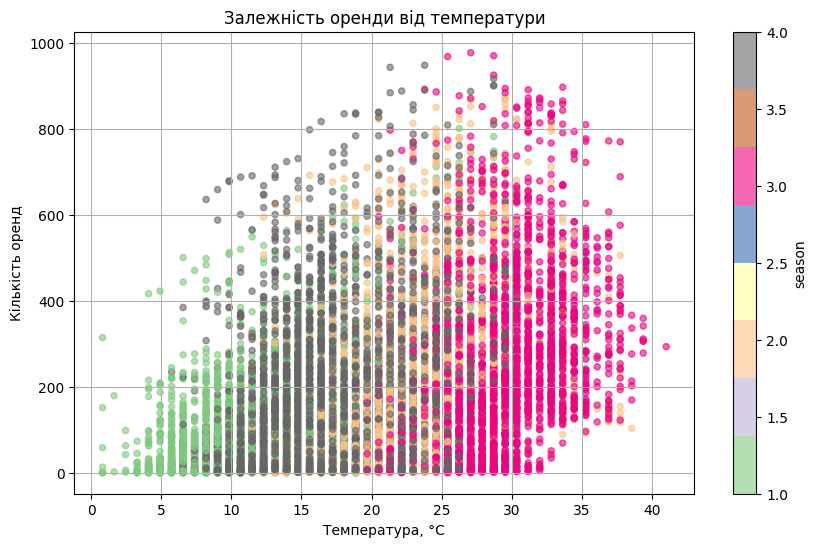

In [ ]:
df.plot.scatter(
    x='temp',
    y='count',
    figsize=(10,6),
    alpha=0.6,
    c='season',
    cmap='Accent',
    title='Залежність оренди від температури',
    xlabel='Температура, °C',
    ylabel='Кількість оренд'
)

plt.grid(True)

plt.show()

Так, спостерігається позитивний зв’язок між температурою та кількістю оренд.
З підвищенням температури кількість оренд велосипедів зростає.

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

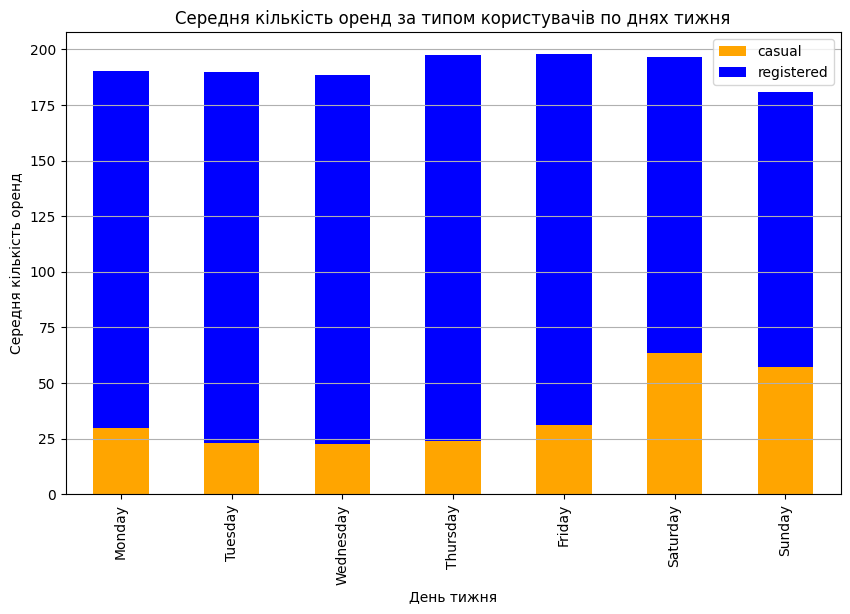

In [ ]:
users_avg = df.groupby('weekday')[['casual','registered']].mean()

ordered_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

users_avg = users_avg.reindex(ordered_days)

users_avg.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['orange', 'blue']
)

plt.title('Середня кількість оренд за типом користувачів по днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Середня кількість оренд')

plt.grid(axis='y')

plt.show()

Зареєстровані користувачі більше орендують велосипеди у будні дні, напевно вони використовують даний вид транспорту для поїздки на роботу і навчання. У вихідні дні попитом на оренду користуються  casual користувачі, вони використовують їх для відпочинку.